In [ ]:
! pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/realdonaldtrump.csv')
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [ ]:
import contractions
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words_en = stopwords.words('english')
# paso extra: stopwords custom
stop_words_en.append('trump')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
ejemplo = "I'm so happy I've survived"
contractions.fix(ejemplo)

'I am so happy I have survived'

In [ ]:
def preprocesamiento_texto(texto):
  #Arreglar texto
  texto = contractions.fix(texto)
  #Hacer texto minusculo
  texto = texto.lower()
  #regex
  texto = re.sub(r'[^a-zA-Z\s]','', texto)
  #Tokenizar
  texto = word_tokenize(texto)
  #Quitar stopwords
  texto = [token for token in texto if token not in stop_words_en]
  #Lemmatizar
  texto = [lemmatizer.lemmatize(word) for word in texto]
  #juntar todo
  texto = ' '.join(texto)
  return texto

In [ ]:
preprocesamiento_texto("I'm so happy I've survived!!?1234")

'happy survived'

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
df['tweet_limpio']=df['content'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 43352/43352 [00:12<00:00, 3348.99it/s]


,id,link,content,date,retweets,favorites,mentions,hashtags,tweet_limpio
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN,sure tune watch donald late night david letter...
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN,donald appearing view tomorrow morning discus ...
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN,donald read top ten financial tip late show da...
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN,new blog post celebrity apprentice finale less...
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN,persona never wallflower would rather build wa...


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams

In [ ]:
def generate_ngrams(n, arreglo):
  x = []
  for texto in arreglo:
    n_grams = ngrams(word_tokenize(texto),n)
    for ngram in n_grams:
      resultado = ' '.join(ngram)
      x.append(resultado)
  return pd.Series(x).value_counts()

In [ ]:
n= 2
trump_ngrams = generate_ngrams(n, df['tweet_limpio'])
data=trump_ngrams.head()
data

,count
fake news,695
america great,603
make america,566
united state,561
run president,435


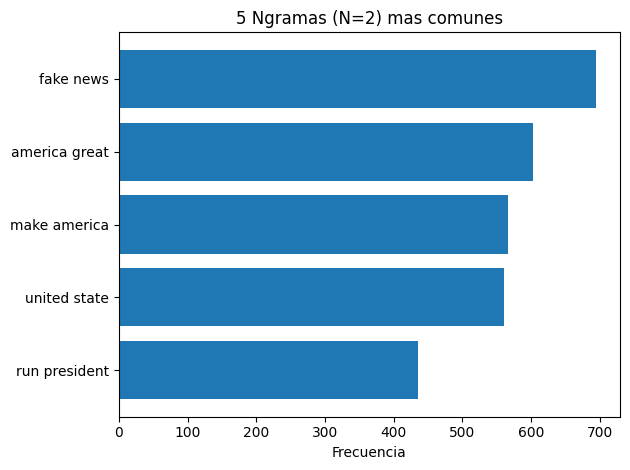

In [ ]:
plt.barh(data.index,data.values)
plt.xlabel('Frecuencia')
plt.title(f"5 Ngramas (N={n}) mas comunes")
plt.gca().invert_yaxis()
plt.tight_layout()

In [ ]:
nube = WordCloud(width=1000, height=1000, colormap='Wistia_r', background_color = 'black').generate_from_frequencies(trump_ngrams)

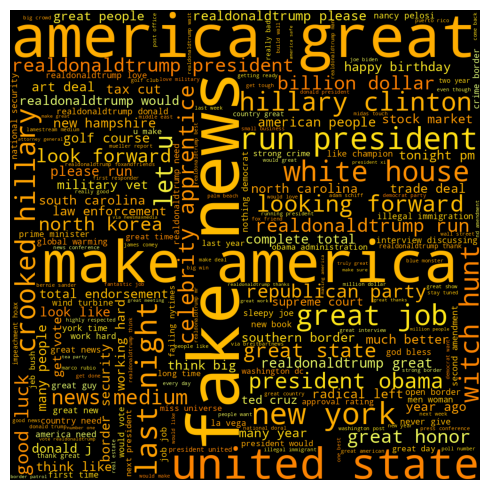

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(nube)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

In [ ]:
import numpy as np
mask = np.array(Image.open('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/trump3.png'))
mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

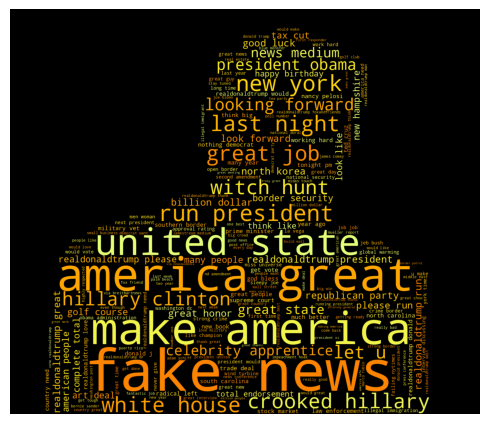

In [ ]:
nube = WordCloud(width=1000, height=1000, colormap='Wistia_r',mask=mask, background_color = 'black').generate_from_frequencies(trump_ngrams)
plt.figure(figsize=(5,5))
plt.imshow(nube)
plt.axis('off')
plt.tight_layout()
plt.show()